**Outcome from this project**


Assuming you are a data scientist at LoanTap, you are tasked with analyzing the
dataset to determine the creditworthiness of potential borrowers. Your ultimate objective
is to build a logistic regression model, evaluate its performance, and provide actionable
insights for the underwriting process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
df=pd.read_csv("loantrap.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


**Dataset Explanation:**
1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records

# Observations on Data

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

there is both categorical and numerical columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
  df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
round(df.isna().sum()/df.shape[0]*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [ ]:
df["emp_length   "].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

all null values present in percentage, there are 7 columns where null values are present

In [ ]:
for i in df.columns:
  print("no of unique values in ",i,":",df[i].nunique())

no of unique values in  loan_amnt : 1397
no of unique values in  term : 2
no of unique values in  int_rate : 566
no of unique values in  installment : 55706
no of unique values in  grade : 7
no of unique values in  sub_grade : 35
no of unique values in  emp_title : 173105
no of unique values in  emp_length : 11
no of unique values in  home_ownership : 6
no of unique values in  annual_inc : 27197
no of unique values in  verification_status : 3
no of unique values in  issue_d : 115
no of unique values in  loan_status : 2
no of unique values in  purpose : 14
no of unique values in  title : 48817
no of unique values in  dti : 4262
no of unique values in  earliest_cr_line : 684
no of unique values in  open_acc : 61
no of unique values in  pub_rec : 20
no of unique values in  revol_bal : 55622
no of unique values in  revol_util : 1226
no of unique values in  total_acc : 118
no of unique values in  initial_list_status : 2
no of unique values in  application_type : 3
no of unique values in  mo

In [ ]:
for  i in df.columns:
  if df[i].dtypes=="float64":
    print("avg values",i,round(df[i].mean(),2))

avg values loan_amnt 14113.89
avg values int_rate 13.64
avg values installment 431.85
avg values annual_inc 74203.18
avg values dti 17.38
avg values open_acc 11.31
avg values pub_rec 0.18
avg values revol_bal 15844.54
avg values revol_util 53.79
avg values total_acc 25.41
avg values mort_acc 1.81
avg values pub_rec_bankruptcies 0.12


This are avg value in entire dataset

In [ ]:
df['zip_code'] = df["address"].str.split().str[-1]

In [ ]:
df.drop(columns='address',inplace=True)

we extract the zipcode from address and now drop the address columns because now address column is not useful anymore with the help of zipcode we can predict geolocation analysis

In [ ]:
df["emp_title"].value_counts()

Teacher                                1115
Manager                                1089
Registered Nurse                        483
RN                                      465
Supervisor                              464
                                       ... 
Research Projects Manager                 1
ProSci Inc.                               1
Seton Medical Center Harker Heights       1
Securitas USA                             1
U.S. Navy                                 1
Name: emp_title, Length: 52881, dtype: int64

customer who are teacher and manager take more loan

In [ ]:
from scipy.stats import iqr
def outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,2)} % Outliers from input data found"
for i in df.columns:
  if df[i].dtype=="float64":
    print(i," : ",outliers(df[i]))


loan_amnt  :  0.0 % Outliers from input data found
int_rate  :  0.01 % Outliers from input data found
installment  :  0.03 % Outliers from input data found
annual_inc  :  0.04 % Outliers from input data found
dti  :  0.0 % Outliers from input data found
open_acc  :  0.03 % Outliers from input data found
pub_rec  :  1.0 % Outliers from input data found
revol_bal  :  0.06 % Outliers from input data found
revol_util  :  1.0 % Outliers from input data found
total_acc  :  0.02 % Outliers from input data found
mort_acc  :  1.0 % Outliers from input data found
pub_rec_bankruptcies  :  1.0 % Outliers from input data found


# Graphical analysis

<Axes: xlabel='term', ylabel='count'>

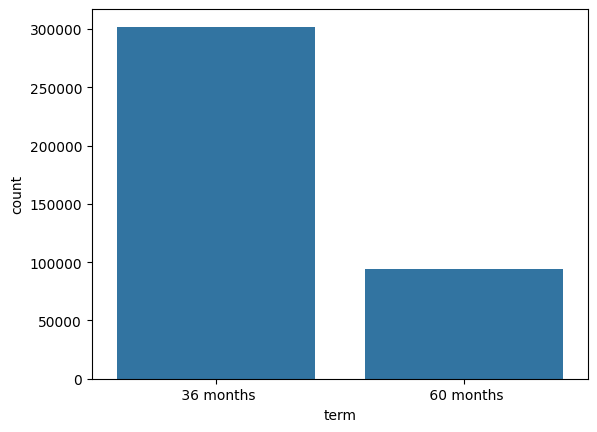

In [ ]:
sns.countplot(x=df["term"])

**there are more customer who take loan on 36 months tenure

<Axes: xlabel='home_ownership', ylabel='count'>

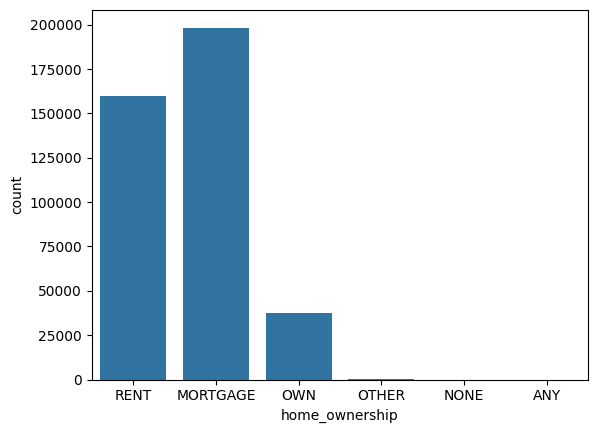

In [ ]:
sns.countplot(x=df["home_ownership"])

<Axes: xlabel='grade', ylabel='count'>

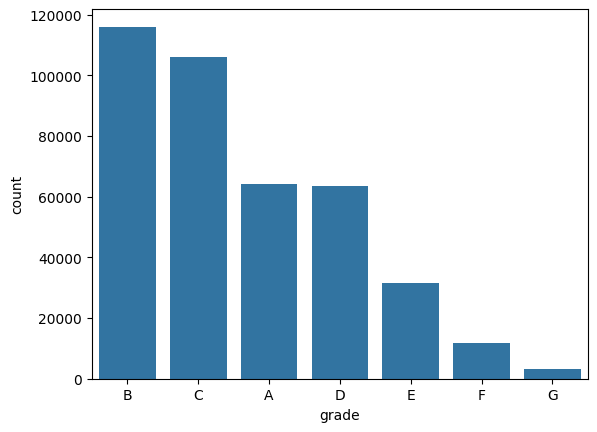

In [ ]:
sns.countplot(x=df["grade"],order=df["grade"].value_counts().index)

<Axes: xlabel='verification_status', ylabel='count'>

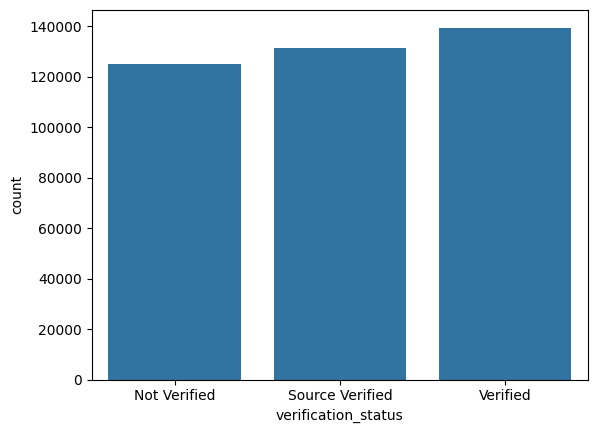

In [ ]:
sns.countplot(x=df["verification_status"])

<Axes: xlabel='loan_status', ylabel='count'>

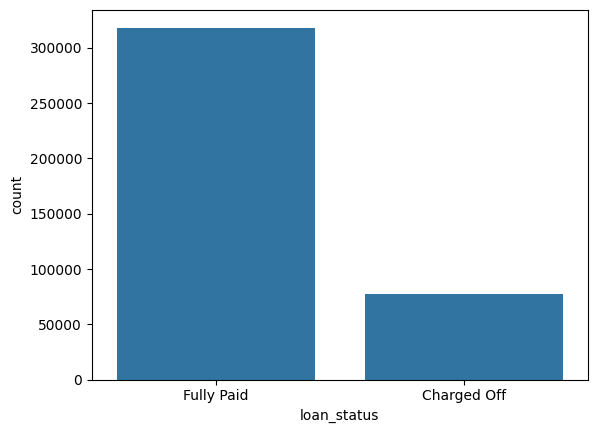

In [ ]:
sns.countplot(x=df["loan_status"])

<Axes: xlabel='initial_list_status', ylabel='count'>

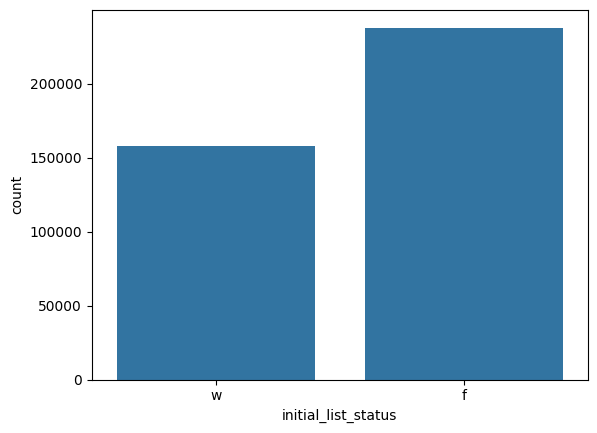

In [ ]:
sns.countplot(x=df["initial_list_status"])

<Axes: xlabel='application_type', ylabel='count'>

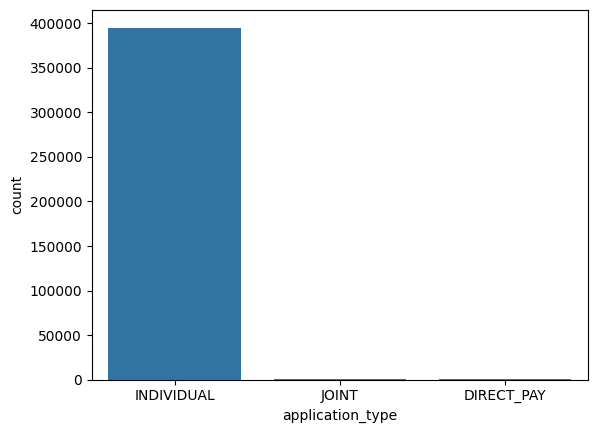

In [ ]:
sns.countplot(x=df["application_type"])

<Axes: xlabel='zip_code', ylabel='count'>

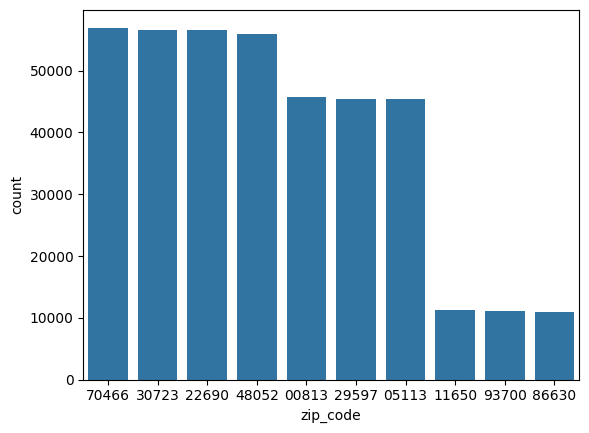

In [ ]:
sns.countplot(x=df["zip_code"],order=df["zip_code"].value_counts().index)

**Bivariate Analysis**

<Axes: xlabel='initial_list_status', ylabel='loan_amnt'>

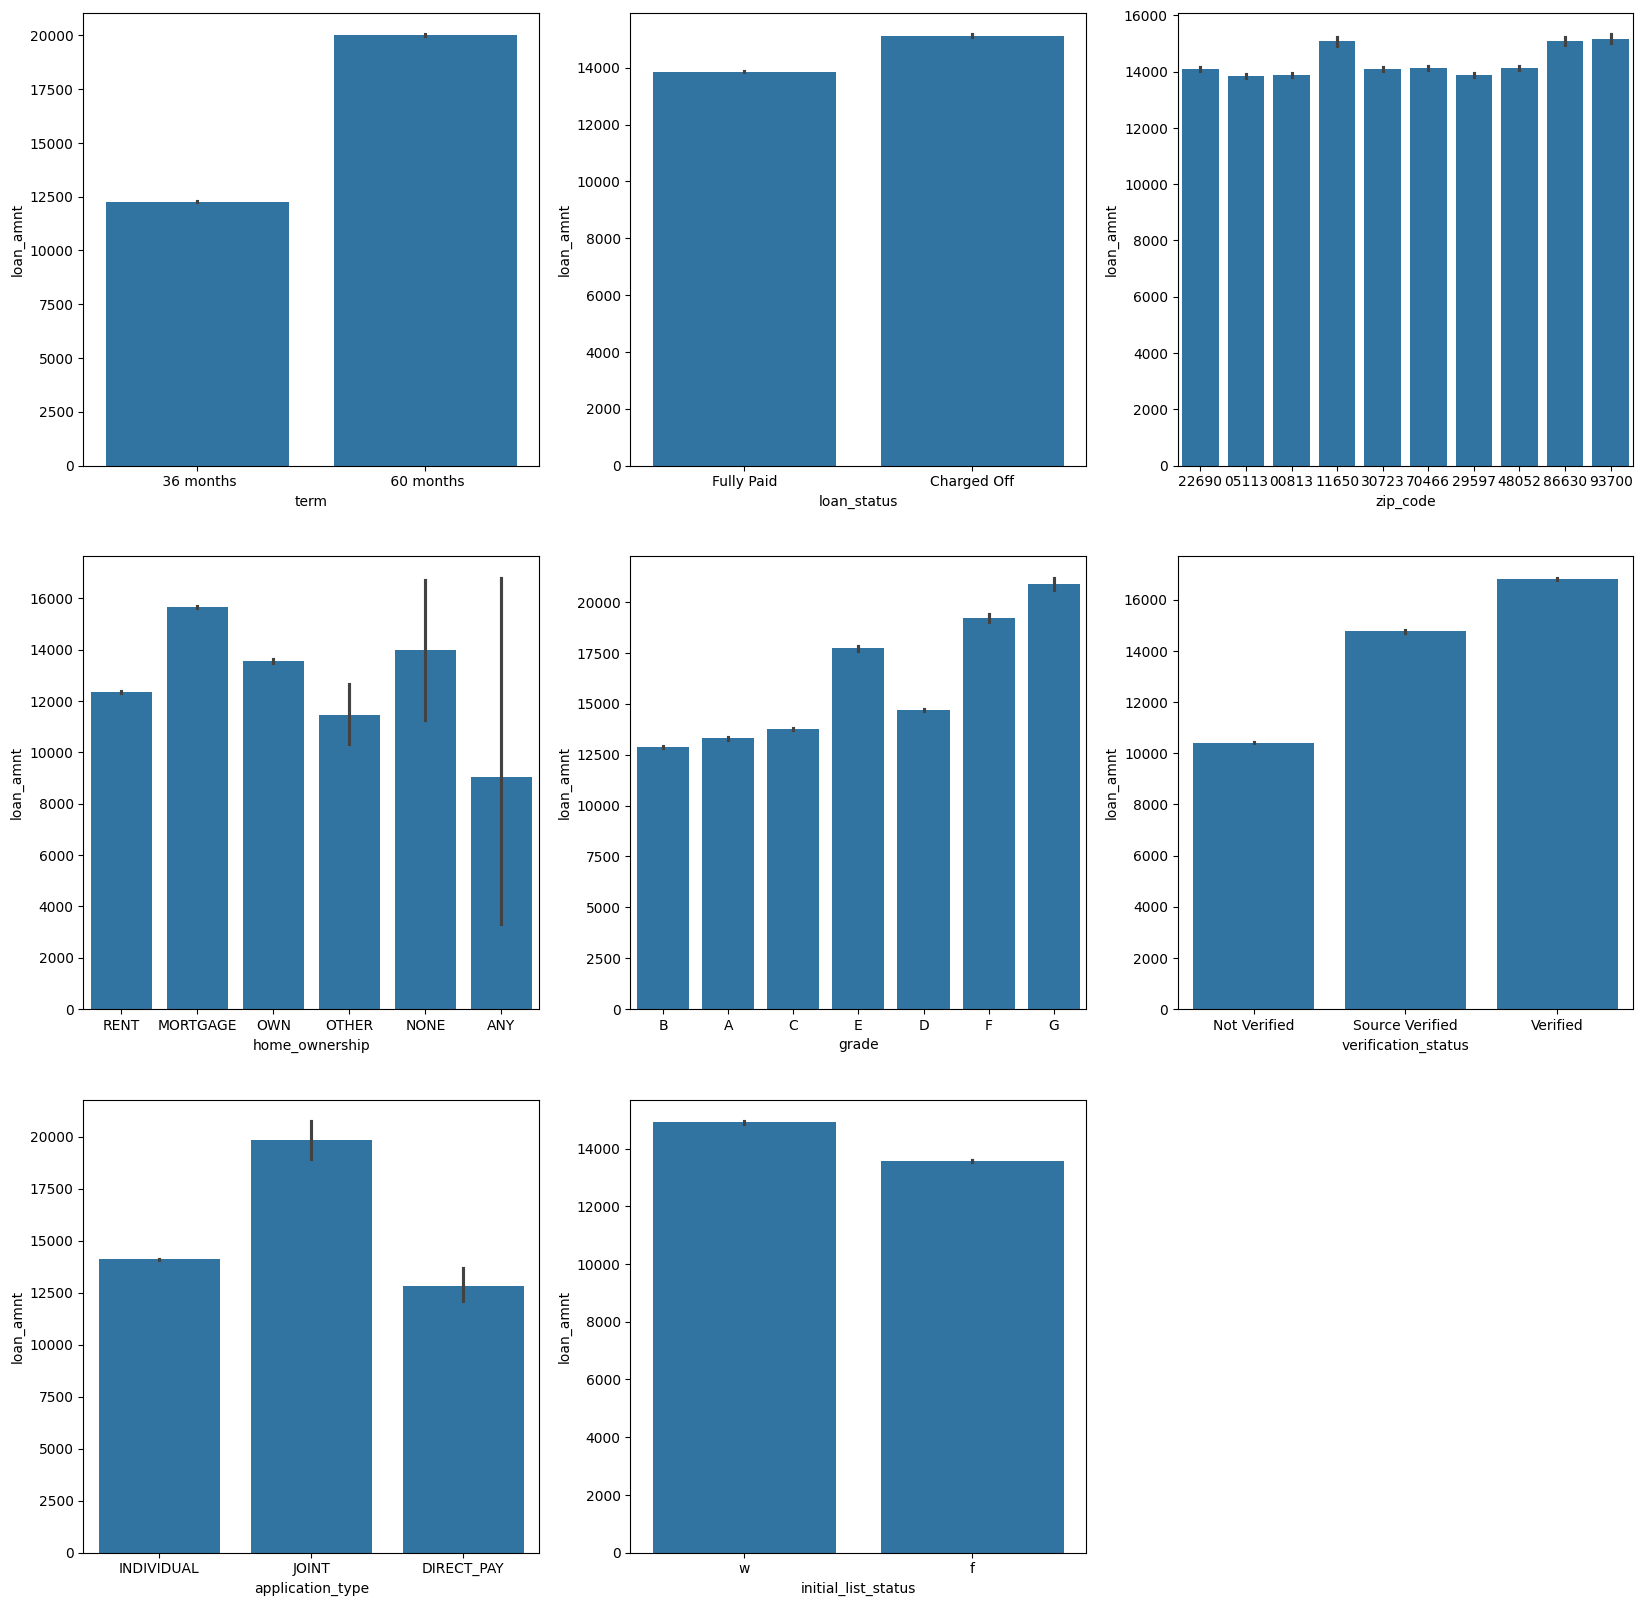

In [ ]:
fig = plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.barplot(data=df,y='loan_amnt',x='term')
plt.subplot(3,3,2)
sns.barplot(data=df,y='loan_amnt',x='loan_status')
plt.subplot(3,3,3)
sns.barplot(data=df,y='loan_amnt',x='zip_code')
plt.subplot(3,3,4)
sns.barplot(data=df,y='loan_amnt',x='home_ownership')
plt.subplot(3,3,5)
sns.barplot(data=df,y='loan_amnt',x='grade')
plt.subplot(3,3,6)
sns.barplot(data=df,y='loan_amnt',x='verification_status')
plt.subplot(3,3,7)
sns.barplot(data=df,y='loan_amnt',x='application_type')
plt.subplot(3,3,8)
sns.barplot(data=df,y='loan_amnt',x='initial_list_status')

there is more customer who took loan in 36 months tenure but customer who have 60 months tenure those have more loan amount compare than 36 months

there are more customer who have verified and less not verified customer

there are more customer who take loan individual but there are customer who take loan joint have more amount compare than individual

customer with mortgage are taking more loan amount and more loan mean high applicants with mortage

as grade increase means move a towards g there are increase in loan amount as well

<Axes: >

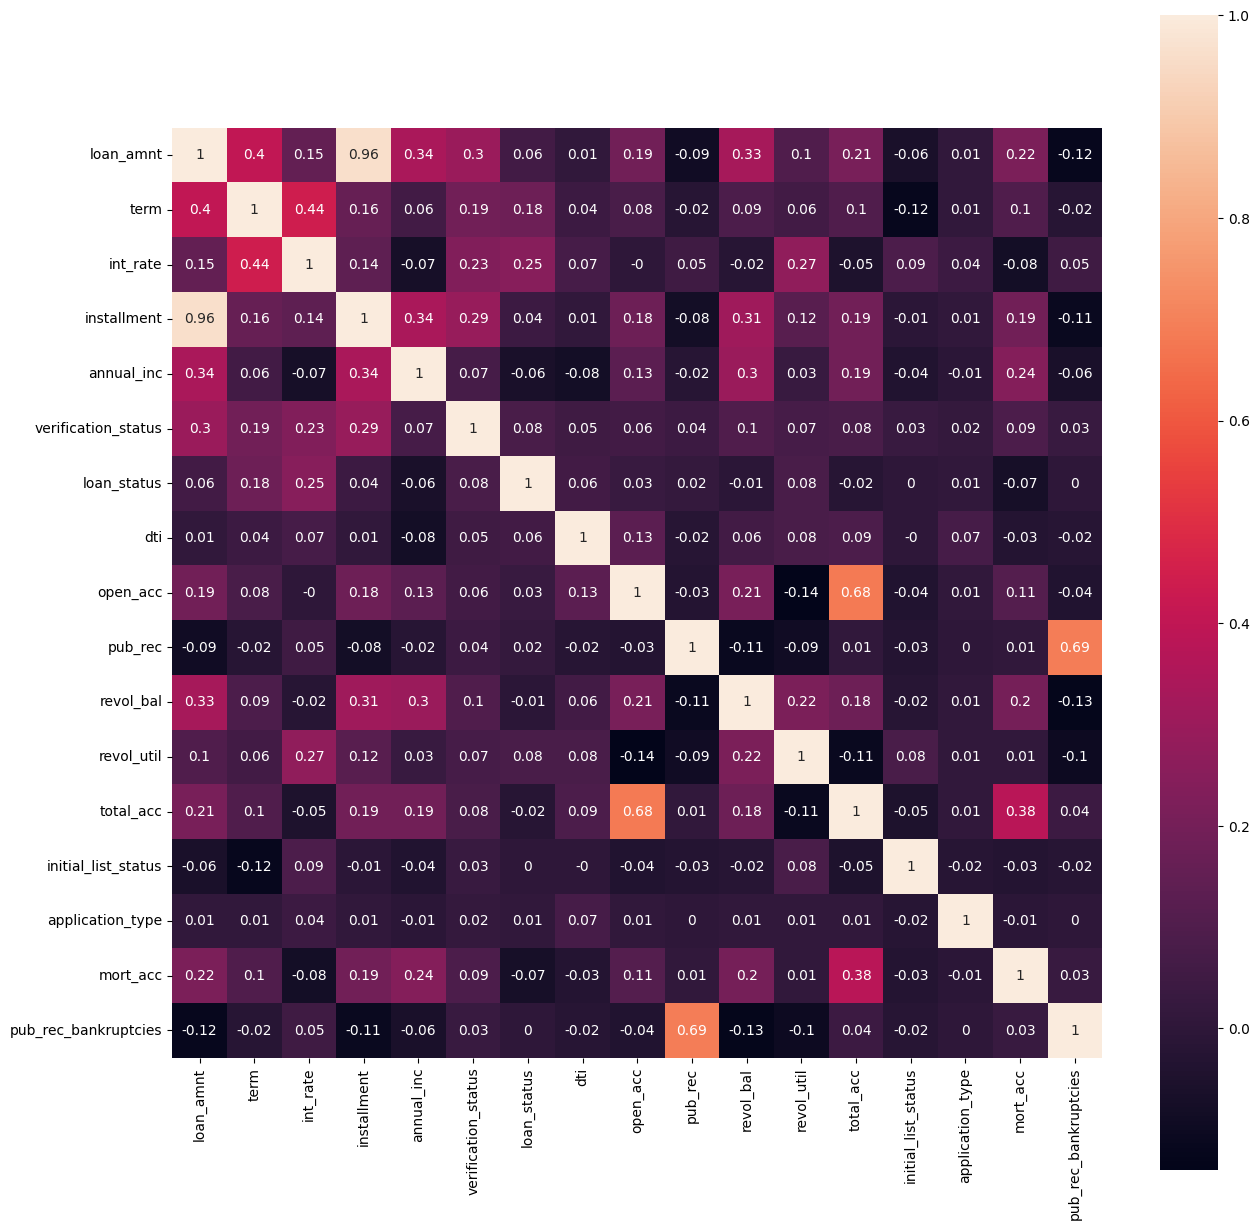

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

**Outlier detection**

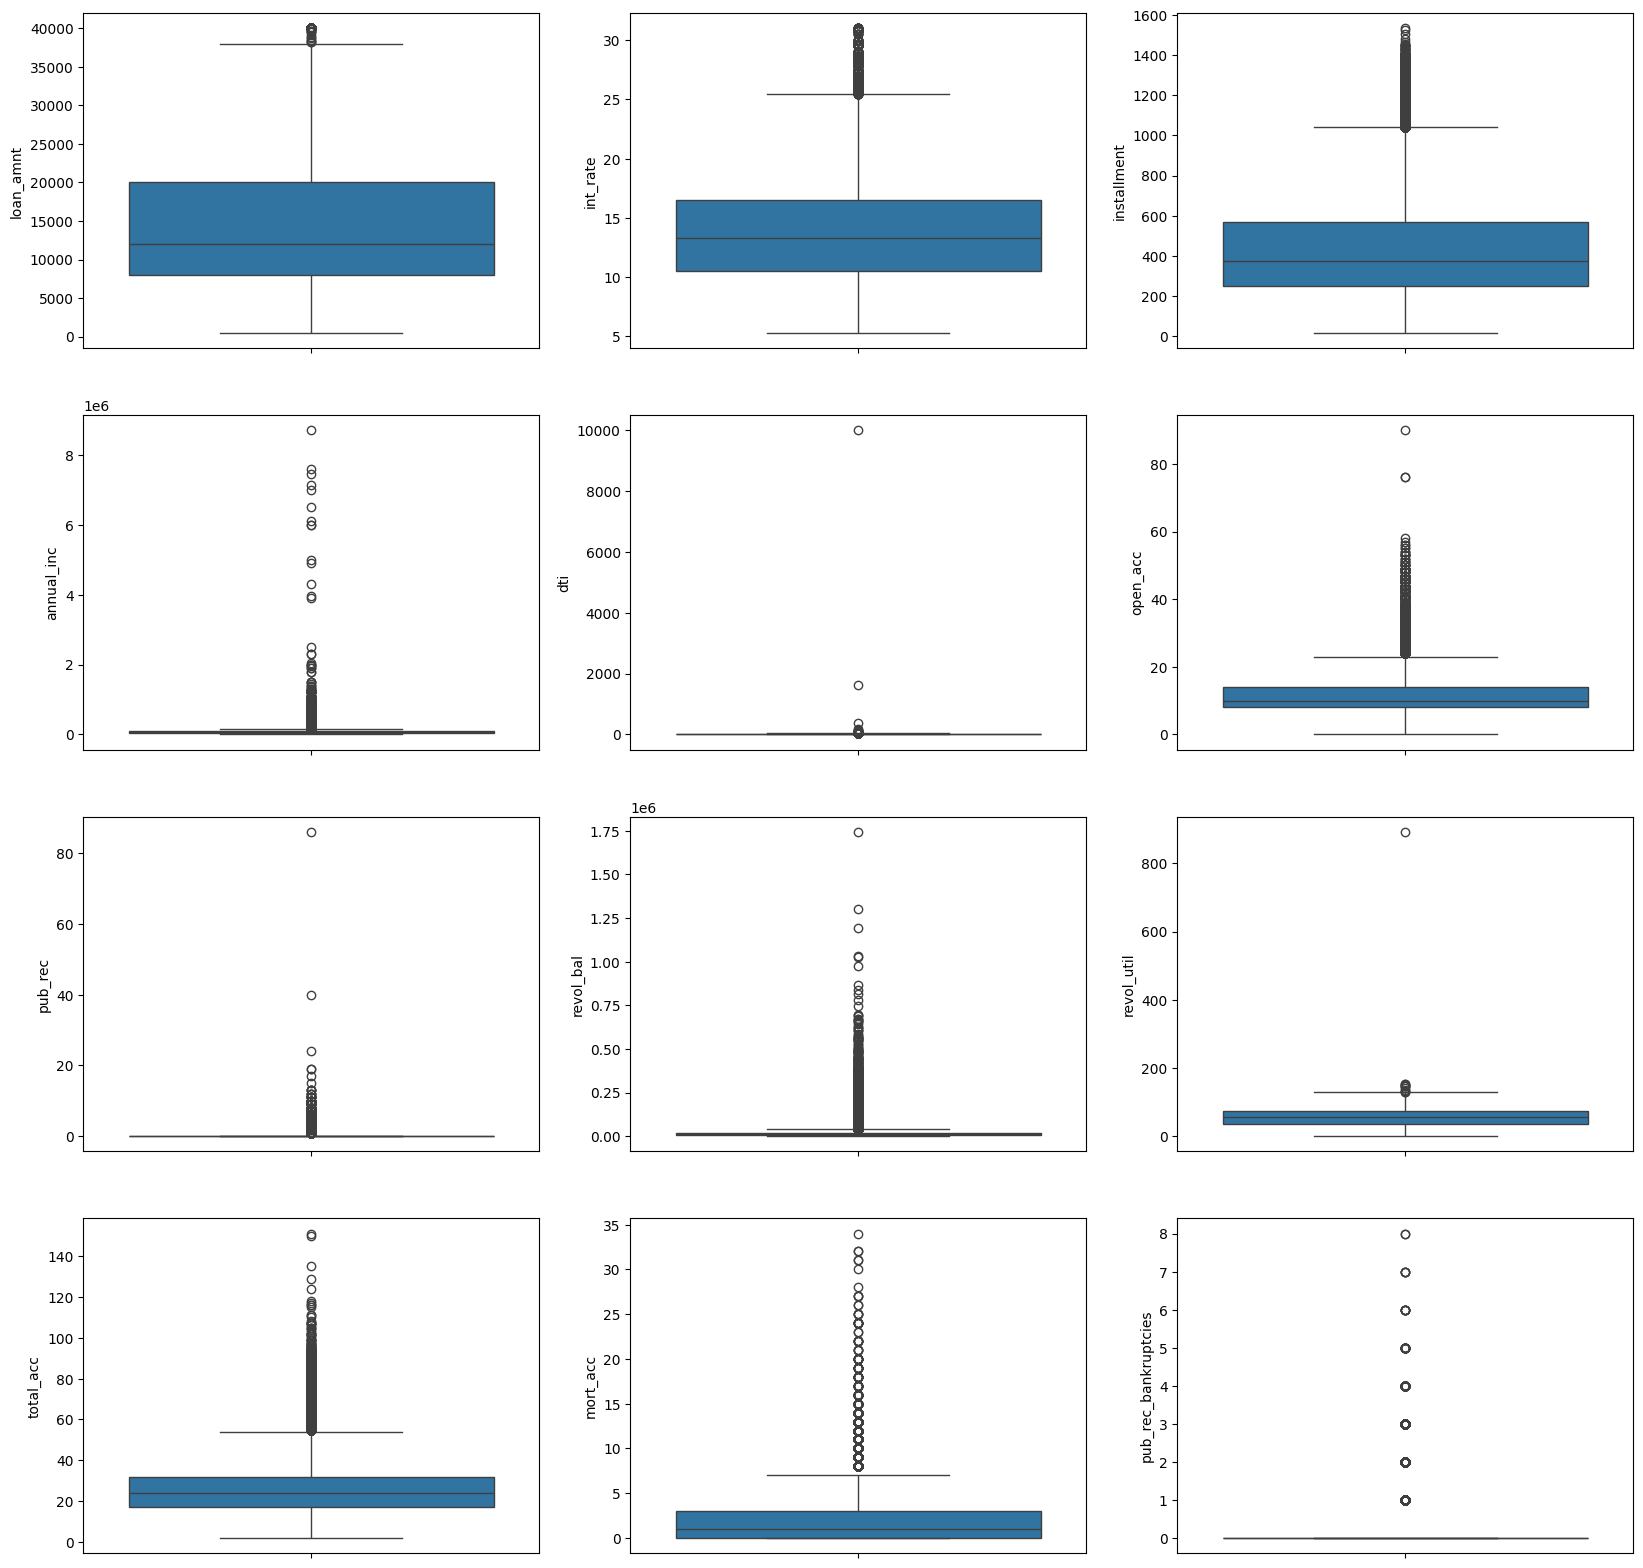

In [ ]:
fig = plt.figure(figsize = (20,20))
k=1
for i in df.columns:
  if df[i].dtype=="float64":
    plt.subplot(4,3,k)
    sns.boxplot(data=df,y=i)
    k+=1

In [ ]:
df["term"].replace({" 36 months":36,
                          " 60 months" : 60},inplace=True)


In [ ]:
df["initial_list_status"].replace({"w":0,
                          "f" : 1},inplace=True)

In [ ]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [ ]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [ ]:
df["application_type"].replace({"INDIVIDUAL":0,
                          "JOINT" : 1,"DIRECT_PAY":2},inplace=True)

In [ ]:
df["verification_status"].replace({"Not Verified":0,
                          "Source Verified" : 1,"Verified":2},inplace=True)

In [ ]:
df.drop(columns=["grade"],axis=1,inplace=True)

In [ ]:
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
 'address', 'earliest_cr_line', 'emp_length',"home_ownership","purpose"],
 axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay as dis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
 stratify=y, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)
print("Accuracy of Logistic Regression Classifier on test set: {:.3f}".f,y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84514  1267]
 [20420  1204]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     85781
           1       0.49      0.06      0.10     21624

    accuracy                           0.80    107405
   macro avg       0.65      0.52      0.49    107405
weighted avg       0.74      0.80      0.73    107405



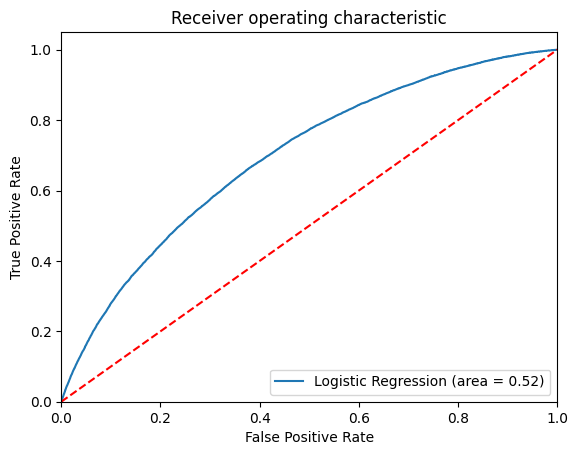

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr,tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("log_Roc")
plt.show()

**Questionnaire**

1. What percentage of customers have fully paid their Loan Amount?

  Ans. 80% customers are fully paid their loan amount
2. Comment about the correlation between Loan Amount and Installment features.

  Ans.both variables are positively correalted there is high correlation
3. The majority of people have home ownership as _______.

  Ans. the majority of people have home ownership as mortagage.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

  Ans. False B grade are more customer who paid fully then c then a then d then e then g
5. Name the top 2 afforded job titles.

  Ans. there are 2 job titles are follows 1 Teacher 2 Manager
6. Thinking from a bank's perspective, which metric should our primary focus be
on..
  1. ROC AUC
  2. Precision
  3. Recall
  4. F1 Score

  Ans. Precision
  While other metrics like Recall, F1 Score, and ROC AUC are also relevant, Precision is often emphasized in situations where the cost of false positives (approving a risky loan) is high, as is the case in credit risk assessment. However, the choice of the most appropriate metric can depend on the specific goals and considerations of the bank
7. How does the gap in precision and recall affect the bank?

  Ans. the gap between precision and recall has multifaceted implications for a bank, impacting risk management, profitability, customer satisfaction, regulatory compliance, resource allocation, and overall reputation. The challenge lies in finding the optimal balance that aligns with the bank's objectives and risk appetite.
8. Which were the features that heavily affected the outcome?

  Ans. loan_amnt,
9. Will the results be affected by geographical location? (Yes/No)

  Ans. Yes , Because geographical location provide more information about customer

**Recommendations**

We should try to keep the precision higher as possible compare to recall , and keep the false positive low.

that will help not to missout the opportopportunity to finance more individuals and earn interest on it. This we can achieve by setting up the higher threshold.

Giving loans to those even having slightly higher probability of defaulter, we can maximise the earning , by this risk taking method.

and Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.

Giving loans to those who have no mortgage house of any owned property have higher probability of defaulter , giving loan to this category borrowers can be a problem of NPA.